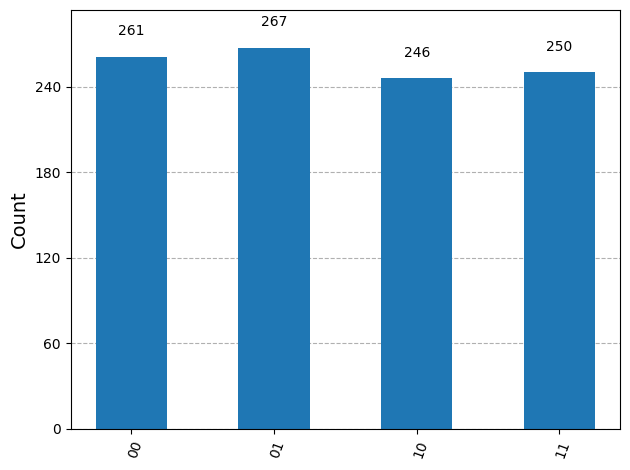

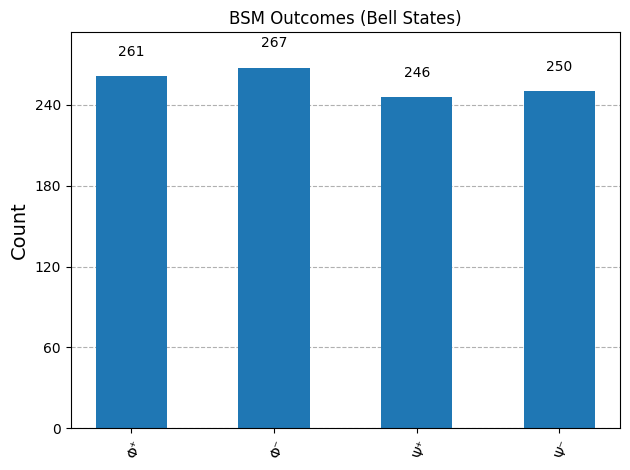

In [34]:
# ==============================
# Project 2 – Part A: Entanglement and Bell-State Measurement
# ==============================

# ------------------------------
# 1. Import Dependencies
# ------------------------------
%matplotlib inline

from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
import networkx as nx

# ------------------------------
# 2. Initialize Quantum Circuit
# ------------------------------
# Two qubits (Q0, Q1) and two classical bits (C0, C1)
qc = QuantumCircuit(2, 2)

# ------------------------------
# 3. Create Entanglement
# ------------------------------
# Hadamard on Q0 to create superposition
qc.h(0)
qc.h(1)
# CNOT to entangle Q0 and Q1
qc.cx(0, 1)

# ------------------------------
# 4. Bell-State Measurement (BSM)
# ------------------------------
# Measure both qubits into classical bits
qc.measure([0, 1], [0, 1])

# ------------------------------
# 5. Execute Circuit and Plot Histogram
# ------------------------------
simulator = AerSimulator()

# Transpile the circuit for the simulator
qc_transpiled = transpile(qc, simulator)

# Run the circuit on the simulator
result = simulator.run(qc_transpiled, shots=1024).result()

# Get counts and plot histogram
counts = result.get_counts()
plot_histogram(counts)
plt.show()

# Map classical outcomes to Bell states
bell_labels = {'00': 'Φ⁺', '01': 'Φ⁻', '10': 'Ψ⁺', '11': 'Ψ⁻'}

# Replace counts keys for plotting
counts_labeled = {bell_labels[k]: v for k, v in counts.items()}

plot_histogram(counts_labeled, title="BSM Outcomes (Bell States)")
plt.show()

